# EDA Plots for Delphes (fastsim) data both old (4M) and new (70M)

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import h5py
import os

In [17]:
# old
os.listdir("/clusterfs/ml4hep/mfong/transfer_learning/")

['delphes_test.h5', 'delphes_train.h5']

In [18]:
os.listdir("/global/ml4hep/spss/mfong/transfer_learning/delphes_train/")

['train_10.h5',
 'train_5.h5',
 'train_0.h5',
 'train_8.h5',
 'train_14.h5',
 'train_4.h5',
 'train_1.h5',
 'train_6.h5',
 'train_12.h5',
 'train_7.h5',
 'train_9.h5',
 'train_2.h5',
 'train_13.h5',
 'train_11.h5',
 'train_3.h5']

In [38]:
f_fastsim_old = h5py.File('/clusterfs/ml4hep/mfong/transfer_learning/delphes_train.h5', 'r')
f_fastsim_new = h5py.File('/global/ml4hep/spss/mfong/transfer_learning/delphes_train/train_12.h5', 'r')

f_fullsim = h5py.File("/global/ml4hep/spss/mfong/transfer_learning/train.h5", 'r')

In [39]:
# try ignoring E, use just eta phi pt
num_samples = 4000000
for k in f_fastsim_old.keys():
    print(k, f_fastsim_old[k].shape, f_fastsim_new[k].shape, f_fullsim[k].shape)

fjet_clus_E (4000068, 200) (5000000, 200) (42233012, 200)
fjet_clus_eta (4000068, 200) (5000000, 200) (42233012, 200)
fjet_clus_phi (4000068, 200) (5000000, 200) (42233012, 200)
fjet_clus_pt (4000068, 200) (5000000, 200) (42233012, 200)
fjet_eta (4000068,) (5000000,) (42233012,)
fjet_m (4000068,) (5000000,) (42233012,)
fjet_phi (4000068,) (5000000,) (42233012,)
fjet_pt (4000068,) (5000000,) (42233012,)
labels (4000068,) (5000000,) (42233012,)


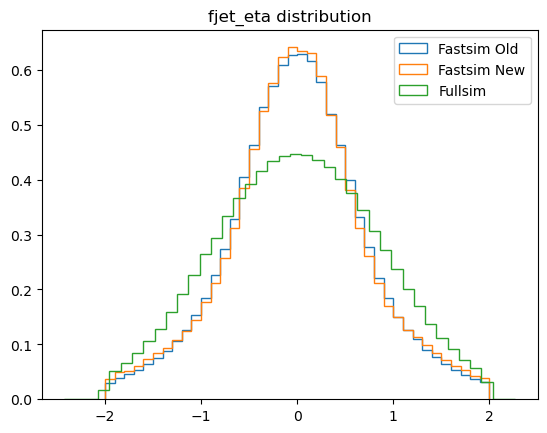

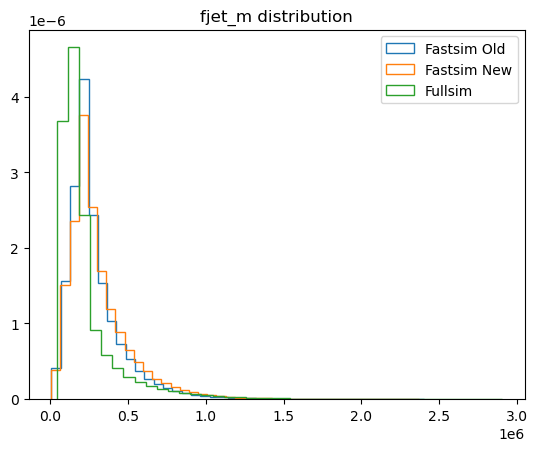

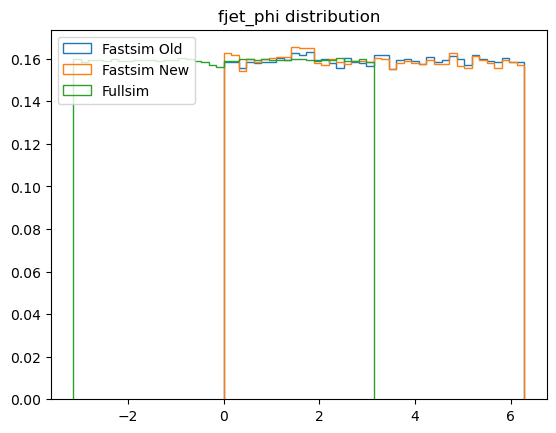

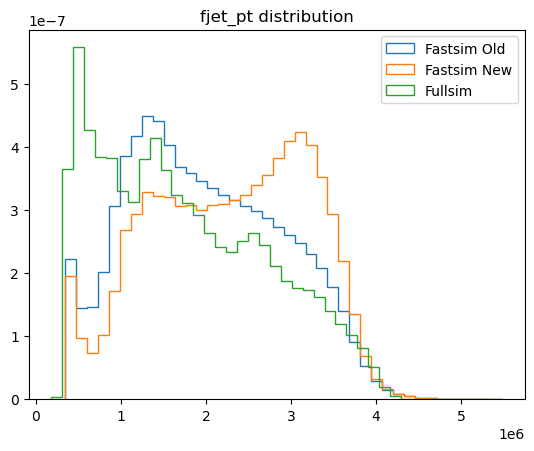

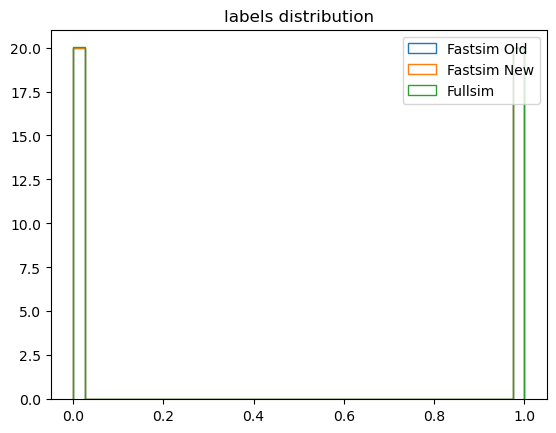

In [40]:
for k in list(f_fastsim_old.keys())[4:]:
    plt.hist(f_fastsim_old[k][:num_samples], bins=40, alpha=1, label="Fastsim Old", histtype="step", density=True)
    plt.hist(f_fastsim_new[k][:num_samples], bins=40, alpha=1, label="Fastsim New", histtype="step", density=True)
    plt.hist(f_fullsim[k][:num_samples], bins=40, alpha=1, label="Fullsim", histtype="step", density=True)
    
    plt.title(k + " distribution")
    plt.legend()
    plt.savefig(f"output/{k}_distribution.png")
    plt.show()

In [41]:
# sparsity check (non zero entries)
print("Nonzero entries")
for k in list(f_fastsim_old.keys())[:4]:
    print(k)
    print("f_fastsim_old:", np.count_nonzero(f_fastsim_old[k][:num_samples]) / np.product(f_fastsim_old[k][:num_samples].shape))
    print("f_fastsim_new:", np.count_nonzero(f_fastsim_new[k][:num_samples]) / np.product(f_fastsim_new[k][:num_samples].shape))
    print("f_fullsim:", np.count_nonzero(f_fullsim[k][:num_samples]) / np.product(f_fullsim[k][:num_samples].shape))

Nonzero entries
fjet_clus_E
f_fastsim_old: 0.3241426525
f_fastsim_new: 0.33253227875
f_fullsim: 0.27939411625
fjet_clus_eta
f_fastsim_old: 0.3241235525
f_fastsim_new: 0.33251318625
f_fullsim: 0.27939411625
fjet_clus_phi
f_fastsim_old: 0.32413748
f_fastsim_new: 0.3325267625
f_fullsim: 0.27939411625
fjet_clus_pt
f_fastsim_old: 0.3241426525
f_fastsim_new: 0.33253227875
f_fullsim: 0.27939411625
